In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
sales = pd.read_csv("Datasets/IEA Global EV Data 2024 v2.csv")
sales.head()

,region,category,parameter,mode,powertrain,year,unit,quantity
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100.0
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0


In [12]:
policies = pd.read_csv("Datasets/Policy Explorer 2024 v2.csv", encoding='latin-1')

#convert Year to integer and drop blank rows
policies['Year'] = policies['Year'].astype(int)
policies.head()

,Region,Region2,Country,Policy Level,Province,Policy Type,Key policy measures and targets,Category,Year
0,Africa,Rest of the World,Algeria,National,NaN,Legislation,Ban on imports more than 3 years old.,Multiple,2021
1,Africa,Rest of the World,Angola,National,NaN,Legislation,50% reduction of both import duty and vehicle ...,Multiple,2022
2,Central and South America,Rest of the World,Antigua and Barbuda,National,NaN,Target,Transition the government fleet to all-electri...,Multiple,2021
3,Central and South America,Rest of the World,Argentina,National,NaN,Ambition,2 500 jobs in battery manufacturing by 2030.,Manufacturing,2021
4,Central and South America,Rest of the World,Argentina,National,NaN,Proposal,Ban on sale of new ICE vehicles from 2041.,Multiple,2021


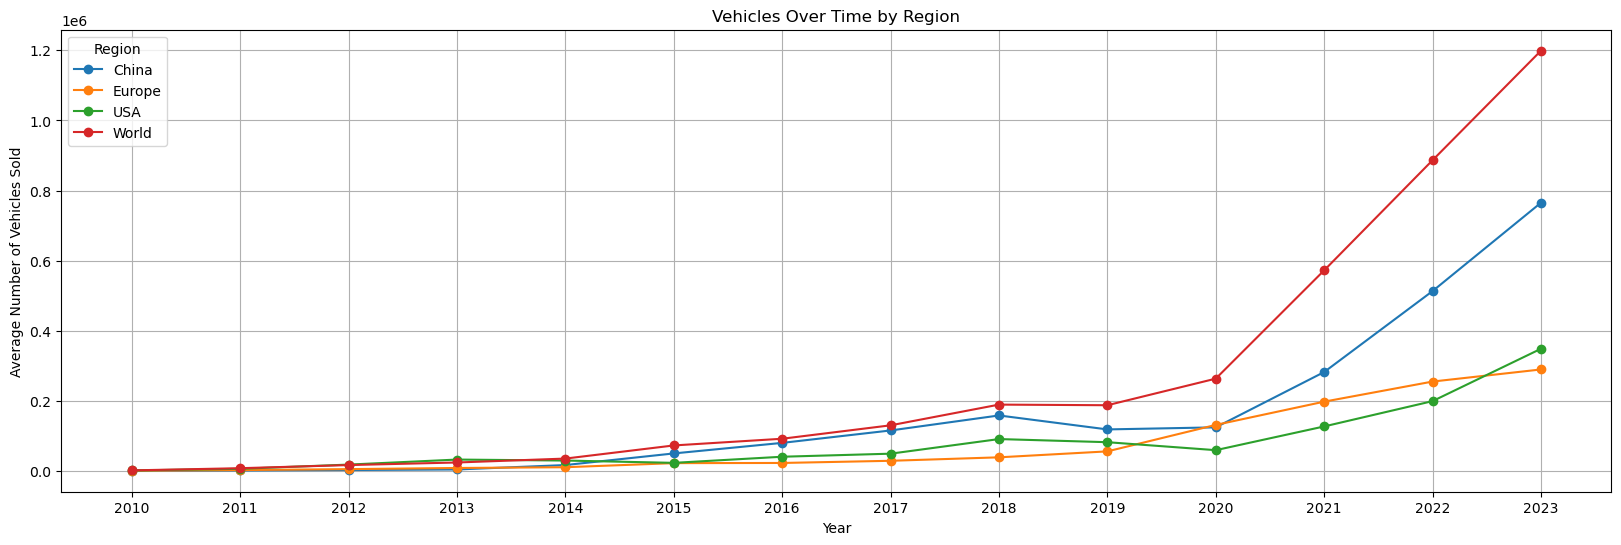

In [27]:
#Group sales by region and year, total by average of unit = 'Vehicles'
selected_regions = ['USA', 'China', 'Europe', 'World']
filtered_sales = sales[sales['region'].isin(selected_regions)]
average_data = filtered_sales.groupby(['region','year'])['quantity'].mean().reset_index()
plt.figure(figsize=(20, 6))
for region in filtered_sales['region'].unique():
    region_data = average_data[average_data['region'] == region]
    plt.plot(region_data['year'], region_data['quantity'], marker='o', label=region)

plt.title('Vehicles Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average Number of Vehicles Sold')
plt.legend(title='Region')
plt.grid()
plt.xticks(region_data['year'].unique())  
plt.show()


#Create line graph of each country's sales over time. Add policies points on line

#Filter first for countries where there is a match between the two data sources. See if there's a trend in the location of the policy datapoint and the country's sales trends. 


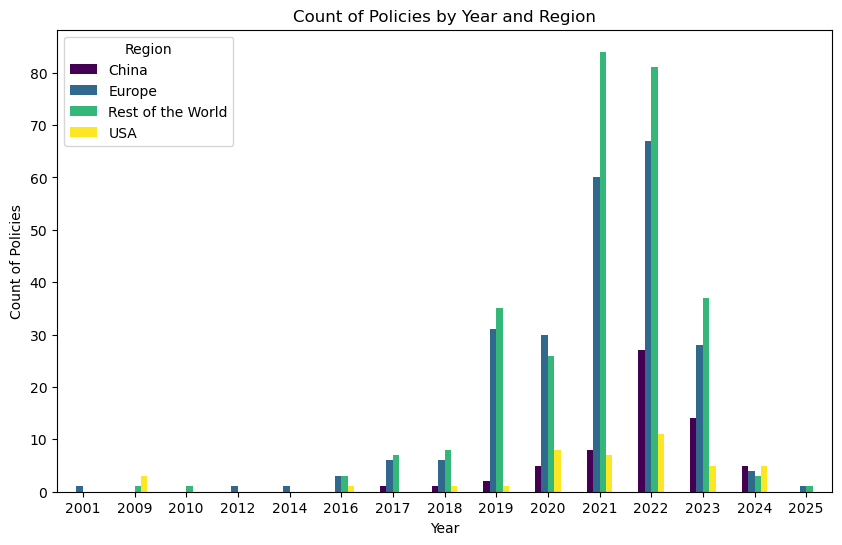

In [22]:
#Group policies by country and year, total by count of policy type
grouped_policies = policies.groupby(['Year', 'Region2']).size().unstack(fill_value=0)
ax = grouped_policies.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Count of Policies by Year and Region')
plt.xlabel('Year')
plt.ylabel('Count of Policies')

plt.xticks(rotation=0)
plt.legend(title='Region')
plt.show()
